# DEVELOPMENT OF DISSERTATION TOPIC GENERATOR FOR M.S.C STUDENTS USING MACHINE LEARNING

In [1]:
# LOADING LIBRARY
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk import pos_tag, word_tokenize
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.cluster import KMeans
import gensim
from gensim import corpora
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import pyLDAvis
import pyLDAvis.lda_model

import spacy
import nltk
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import cosine_similarity


import pyLDAvis
import pyLDAvis.lda_model

pyLDAvis.lda_model.prepare


C:\Users\pc\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\pc\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


<function pyLDAvis.lda_model.prepare(lda_model, dtm, vectorizer, **kwargs)>

In [2]:

# Load CSV and Excel files
data1 = pd.read_csv(r"C:/Users/pc/Downloads/Primary_data.csv")
data2 = pd.read_csv(r"C:/Users/pc/Downloads/Primary_data1.csv")
file_path = 'C:/Users/pc/Downloads/data (Autosaved).xlsx'
sheet_name = 'Sheet2'
data3 = pd.read_excel(file_path, sheet_name=sheet_name)

# Combine the data from all sources
primary_data = pd.concat([data1, data2, data3], ignore_index=True)

# Drop irrelevant columns
primary_data = primary_data.drop(columns=['Unnamed: 0', 'Responsibilities', 'Career Goals', 'Preferred Job Title'])

# Combine columns to form new structure
primary_data['Academic Background'] = primary_data['Previous Degrees Program']
primary_data['Work Experience'] = primary_data['Job Title']

# Combine potential thesis topics into a single column
primary_data['Potential Thesis Topics'] = primary_data['Potential Thesis Topic 1'].fillna('') + ' / ' + primary_data['Potential Thesis Topic 2'].fillna('')

# Drop the original columns that have been combined
primary_data = primary_data.drop(columns=['Current Degree Program', 'Previous Degrees Program', 'Job Title', 'Potential Thesis Topic 1', 'Potential Thesis Topic 2'])

# Clean up the final DataFrame by removing unnecessary separators if any topics are missing
primary_data['Potential Thesis Topics'] = primary_data['Potential Thesis Topics'].str.strip(' / ')
primary_data = primary_data.drop(columns=['Potential Thesis Topics', 'Student ID'])

# Function to remove degree prefixes
def remove_degree_prefixes(program):
    # Define a regular expression pattern to match and remove degree prefixes
    pattern = r'(B.A in |B.Tech in |B.Sc in |Ph.D. in |Bachelor of Arts in |Master of Science in |Bachelor of Engineering in |Bachelor|Master|Ph\.?D|B\.Tech|B\.Sc|B\.S\.C|BSC|M\.Sc|B\.A)\.?|Master of Science in|Bachelor of Science in|Bachelor of Engineering in| of Science in| of Engineering in|in  | in  in '
    return re.sub(pattern, '', program, flags=re.IGNORECASE)

# Apply the function to remove degree prefixes from 'Academic Background' column
primary_data['Academic Background'] = primary_data['Academic Background'].apply(remove_degree_prefixes)

# Combine all columns into a single column
primary_data['Combined'] = primary_data.apply(lambda row: ' | '.join(row.values.astype(str)), axis=1)


# Drop rows where the number of missing values is more than 2

primary_data.dropna(inplace=True)

# Copy the cleaned DataFrame to a new variable if needed
df_primary = primary_data.copy()



In [3]:
df_primary.head()

,Interests,Description of Social Activities,Preferred Industry,Academic Background,Work Experience,Combined
0,Internet of Things (IoT),Member of the cybersecurity club,Technology,Data Analytics,Cybersecurity Specialist,Internet of Things (IoT) | Member of the cyber...
1,Internet of Things (IoT),Leading a software development team,minning,Computer Science,Software Developer,Internet of Things (IoT) | Leading a software ...
2,Software Engineering,Volunteering at local coding clubs,Technology,Software Engineering,Machine Learning Engineer,Software Engineering | Volunteering at local c...
3,Software Engineering,Leading a software development team,Education,Cybersecurity,Machine Learning Engineer,Software Engineering | Leading a software deve...
4,Internet of Things (IoT),Organizing IoT workshops,Education,Computer Science,Software Developer,Internet of Things (IoT) | Organizing IoT work...


<AxesSubplot:xlabel='Academic Background'>

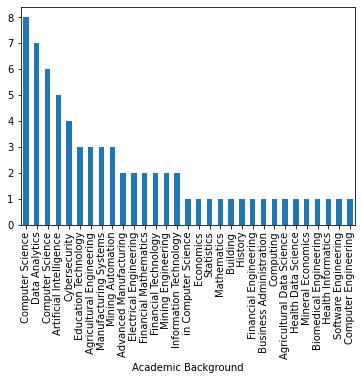

In [4]:
primary_data["Academic Background"].value_counts().plot(kind="bar")

<AxesSubplot:xlabel='Interests'>

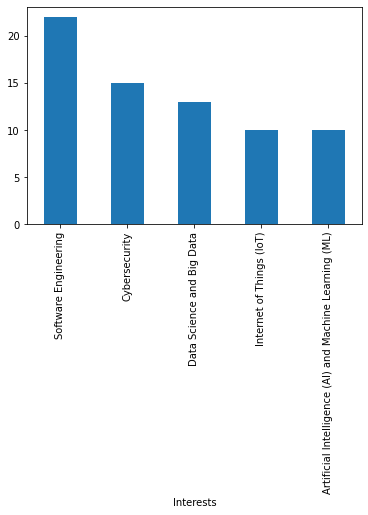

In [5]:
primary_data["Interests"].value_counts().plot(kind="bar")

Most Common Keywords:
[('Leading a software development team', 12), ('Organizing IoT workshops', 9), ('Engaging in community farming projects', 8), ('Member of the cybersecurity club', 7), ('Volunteering at local coding clubs', 7), ('Participating in hackathons', 4), ('Participating in mineral conservation activities', 3), ('Going for community meetup', 1), ('Photography', 1), ('Networking with individuals in my tech communities', 1)]


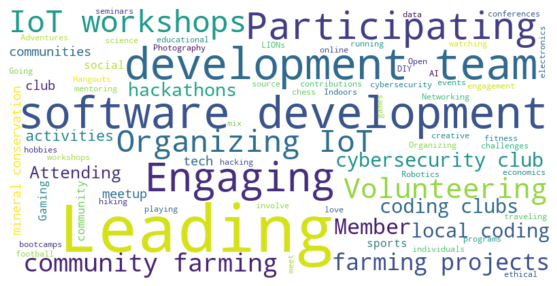

In [6]:
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Column name
column_name = 'Description of Social Activities'

# Convert all entries to strings, then join and split into keywords
all_keywords = ', '.join(primary_data[column_name].astype(str)).split(', ')

# Count occurrences of each keyword
keyword_counter = Counter(all_keywords)

# Display most common keywords
print("Most Common Keywords:")
print(keyword_counter.most_common(10))

# Generate WordCloud for keywords
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_keywords))

# Display the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [7]:

# Load the CSV files
df1 = pd.read_csv("C:/Users/pc/Downloads/data1.csv")
df2 = pd.read_csv("C:/Users/pc/Downloads/df2.csv")
df3 = pd.read_csv("C:/Users/pc/Downloads/df3.csv")
df4 = pd.read_csv("C:/Users/pc/Downloads/df4.csv")
df5 = pd.read_csv("C:/Users/pc/Downloads/df5.csv")

# Combine the DataFrames into one
combined_df = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)

# Drop the 'Unnamed: 0' column if it exists
if 'Unnamed: 0' in combined_df.columns:
    combined_df.drop(columns=["Unnamed: 0"], inplace=True)

# Drop duplicate rows
combined_df.drop_duplicates(inplace=True)

# Reset the index and add a 'Title No' column starting from 1
combined_df.reset_index(drop=True, inplace=True)
combined_df['Title No'] = combined_df.index + 1

# Drop the 'Link' column if it exists
if 'Link' in combined_df.columns:
    combined_df.drop(columns=["Link"], inplace=True)

# Display the final DataFrame
combined_df


,Title,Snippet,Title No
0,[HTML][HTML] Machine learning and artificial i...,… Machine learning (ML) and artificial intelli...,1
1,Edge computing with artificial intelligence: A...,"… machine learning (ML), a recently popular ar...",2
2,Artificial intelligence and machine learning a...,"… computational linguistic etc. Hence, figure ...",3
3,Machine learning and artificial neural network...,"… mainstream AI researchers, but also those wo...",4
4,Artificial intelligence and machine learning i...,… Computational toxicology aims … artificial i...,5
...,...,...,...
510,The role of cloud-MANET framework in the inter...,… This research is a step forward in the field...,511
511,Assessment of the suitability of fog computing...,… computing paradigm and the conventional clou...,512
512,Edge QoE: Computation offloading with deep rei...,"… , we focus on QoE-oriented computation offlo...",513
513,Computation offloading and resource allocation...,… Due to the limited bandwidth of the IoT gate...,514


In [8]:
import re
# Function to remove text inside square brackets
def remove_square_brackets(text):
    return re.sub(r'\[.*?\]', '', text)

# Apply the function to the 'title' column
combined_df['Title'] = combined_df['Title'].apply(remove_square_brackets)

# Display the cleaned DataFrame
print(combined_df)

                                                 Title  \
0     Machine learning and artificial intelligence:...   
1    Edge computing with artificial intelligence: A...   
2    Artificial intelligence and machine learning a...   
3    Machine learning and artificial neural network...   
4    Artificial intelligence and machine learning i...   
..                                                 ...   
510  The role of cloud-MANET framework in the inter...   
511  Assessment of the suitability of fog computing...   
512  Edge QoE: Computation offloading with deep rei...   
513  Computation offloading and resource allocation...   
514   Cloud and fog computing platforms for interne...   

                                               Snippet  Title No  
0    … Machine learning (ML) and artificial intelli...         1  
1    … machine learning (ML), a recently popular ar...         2  
2    … computational linguistic etc. Hence, figure ...         3  
3    … mainstream AI researchers, b

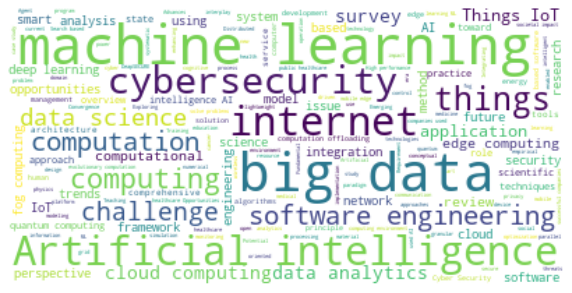

In [9]:

# 1.2 - Visualize the frequency of words to identify common themes
all_titles = ' '.join(combined_df['Title'])
wordcloud = WordCloud(stopwords=stopwords.words('english'), background_color='white').generate(all_titles)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Data Cleaning and Exploration

In [10]:




# Step 1: Text Preprocessing

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove square brackets and text inside them
    text = re.sub(r'\[.*?\]', '', text)
    
    # Remove punctuation and non-alphabetic characters
    text = re.sub(r'[^a-z\s]', '', text)
    
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove stopwords
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    
    # Lemmatization using NLTK's WordNet lemmatizer
    lemmatizer = nltk.WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return ' '.join(tokens)

combined_df['cleaned_title'] = combined_df['Title'].apply(preprocess_text)

Most common words: [('computing', 155), ('data', 139), ('learning', 131), ('intelligence', 113), ('machine', 108), ('artificial', 105), ('big', 102), ('thing', 98), ('internet', 97), ('cybersecurity', 95), ('software', 80), ('engineering', 64), ('computation', 63), ('science', 61), ('iot', 54), ('cloud', 54), ('analytics', 43), ('challenge', 41), ('edge', 40), ('survey', 39)]


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1225: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1225: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1485: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1225: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_c

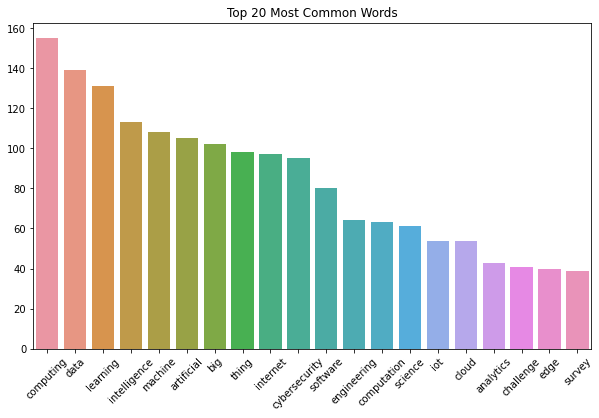

In [11]:
# Step 2: Word Frequency Analysis
# Word Frequency Distribution
all_words = ' '.join(combined_df['cleaned_title']).split()
word_freq = Counter(all_words)
common_words = word_freq.most_common(20)
print("Most common words:", common_words)

# Plotting word frequency
plt.figure(figsize=(10, 6))
sns.barplot(x=[word[0] for word in common_words], y=[word[1] for word in common_words])
plt.title("Top 20 Most Common Words")
plt.xticks(rotation=45)
plt.show()


In [12]:
# Step 3: Topic Modeling using LDA

# Convert text data to a matrix of token counts
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(combined_df['cleaned_title'])

# Fit the LDA model
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(tfidf)

# Visualizing the topics
pyLDAvis.enable_notebook()
panel =  pyLDAvis.lda_model.prepare(lda, tfidf, tfidf_vectorizer, mds='tsne')
panel
# Prepare the LDA visualization


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:819: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


PreparedData(topic_coordinates=               x           y  topics  cluster       Freq
topic                                                   
4      50.238071  -57.323357       1        1  24.907642
0      43.098454 -106.779312       2        1  22.295247
2      56.205387   -7.812199       3        1  20.480616
1       0.638971  -51.306065       4        1  17.934767
3      99.568771  -64.342293       5        1  14.381727, topic_info=              Term       Freq      Total Category  logprob  loglift
278       software  23.000000  23.000000  Default  30.0000  30.0000
108    engineering  18.000000  18.000000  Default  29.0000  29.0000
168       learning  25.000000  25.000000  Default  28.0000  28.0000
303          thing  22.000000  22.000000  Default  27.0000  27.0000
160       internet  22.000000  22.000000  Default  26.0000  26.0000
..             ...        ...        ...      ...      ...      ...
267       security   1.619528   9.712967   Topic5  -4.6551   0.1479
294         survey   1.682431  14.249401   Topic5  -4.6170  -0.1973
58       computing   1.854963  29.839222   Topic5  -4.5194  -0.8387
40       challenge   1.327831  12.306984   Topic5  -4.8537  -0.2874
73   cybersecurity   1.346512  21.255763   Topic5  -4.8397  -0.8199

[252 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
0         4  0.546064         action
5         2  0.487802     agentbased
6         5  0.523269  agentoriented
7         1  0.923204             ai
10        5  0.736575      algorithm
...     ...       ...            ...
314       3  0.334857          using
314       5  0.167429          using
317       3  0.598219         vision
319       1  0.866065       wireless
321       5  0.528567          world

[287 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 1, 3, 2, 4])

In [13]:

import spacy



# Step 5: Sentence Structure and Syntax Analysis

# Load Spacy model for dependency parsing
nlp = spacy.load('en_core_web_sm')

# Dependency Parsing for the first title
doc = nlp(combined_df['cleaned_title'].iloc[0])
for token in doc:
    print(f"{token.text}: {token.dep_} -> {token.head.text}")

# POS Tagging Analysis
combined_df['pos_tags'] = combined_df['cleaned_title'].apply(lambda x: pos_tag(word_tokenize(x)))

# Most common POS patterns
pos_patterns = combined_df['pos_tags'].apply(lambda x: ' '.join([pos for word, pos in x]))
common_pos_patterns = Counter(pos_patterns).most_common(10)
print("Most common POS patterns:", common_pos_patterns)


machine: nmod -> machine
learning: acl -> machine
artificial: amod -> intelligence
intelligence: dobj -> learning
two: nummod -> traveler
fellow: amod -> traveler
traveler: nmod -> machine
quest: appos -> traveler
intelligent: amod -> machine
behavior: compound -> machine
machine: ROOT -> machine
Most common POS patterns: [('JJ NN NN NN', 5), ('JJ NN NN VBG JJ NN NN JJ NN', 5), ('JJ NN NN JJ NN VBN RB NN VBG NN NN', 5), ('JJ NN NN', 5), ('JJ NN NN VBG JJ NN', 4), ('JJ NN NN VBG JJ JJ NN', 4), ('NN VBG JJ NN NN NN', 4), ('NN NN NN NN', 4), ('VBG NN NN NN', 4), ('VBN NN NN', 4)]


In [14]:
common_pos_patterns

[('JJ NN NN NN', 5),
 ('JJ NN NN VBG JJ NN NN JJ NN', 5),
 ('JJ NN NN JJ NN VBN RB NN VBG NN NN', 5),
 ('JJ NN NN', 5),
 ('JJ NN NN VBG JJ NN', 4),
 ('JJ NN NN VBG JJ JJ NN', 4),
 ('NN VBG JJ NN NN NN', 4),
 ('NN NN NN NN', 4),
 ('VBG NN NN NN', 4),
 ('VBN NN NN', 4)]

In [15]:


# Step 6: Semantic Analysis using Word Embeddings

# Example with Gensim's Word2Vec
tokens = [word_tokenize(text) for text in combined_df['cleaned_title']]
model = gensim.models.Word2Vec(tokens, vector_size=100, window=5, min_count=1, workers=4)

# Find similar words to 'artificial intelligence'
similar_words = model.wv.most_similar('artificial')
print("Words similar to 'artificial':", similar_words)



Words similar to 'artificial': [('intelligence', 0.6188130974769592), ('learning', 0.6004453301429749), ('engineering', 0.5925402045249939), ('machine', 0.5905811190605164), ('computing', 0.5846720337867737), ('internet', 0.568080723285675), ('thing', 0.5560798645019531), ('iot', 0.5387808084487915), ('application', 0.5327401161193848), ('emerging', 0.5324785709381104)]


In [16]:


# Find similar words to 'Software'
similar_words = model.wv.most_similar('software')
print("Words similar to 'Software:", similar_words)



Words similar to 'Software: [('computing', 0.5953020453453064), ('thing', 0.5839896202087402), ('computation', 0.5539582371711731), ('engineering', 0.543225109577179), ('artificial', 0.5262095332145691), ('internet', 0.5200061798095703), ('intelligence', 0.5120757222175598), ('model', 0.5101815462112427), ('security', 0.4909646809101105), ('system', 0.48852017521858215)]


In [17]:


# Find similar words to 'cybersecurity'
similar_words = model.wv.most_similar('cybersecurity')
print("Words similar to 'Cybersecurity':", similar_words)



Words similar to 'Cybersecurity': [('computing', 0.676603376865387), ('internet', 0.5467556715011597), ('learning', 0.5324913263320923), ('thing', 0.523160994052887), ('iot', 0.5214210152626038), ('framework', 0.5156627297401428), ('edge', 0.5109730958938599), ('network', 0.49744752049446106), ('artificial', 0.49225053191185), ('software', 0.48195141553878784)]


In [18]:
# Step 7: Classification using Bloom’s Taxonomy of Verbs

# Bloom's Taxonomy of Verbs (Simplified)
bloom_verbs = {
    'Remember':[
    "arrange", "copy", "define", "describe", "discover", "duplicate", 
    "enumerate", "find", "identify", "label", "list", "locate", "match", 
    "memorize", "name", "observe", "omit", "order", "outline", "quote", 
    "recall", "recite", "recognize", "record", "repeat", "reproduce", 
    "retell", "retrieve", "select", "state", "underline"],
    'Understand': [
    "ask", "associate", "cite", "classify", "convert", "demonstrate", "describe", 
    "discover", "discuss", "distinguish", "elaborate", "estimate", "exemplify", 
    "explain", "express", "extend", "familiarize", "generalize", "give examples", 
    "group", "indicate", "interpret", "map", "match", "model", "observe", "order", 
    "outline", "paraphrase", "provide", "relate", "report", "represent", "research", 
    "restate", "review", "rewrite", "select", "show", "summarize", "trace", 
    "translate"],
    'Apply': [
    "act", "administer", "apply", "articulate", "calculate", "change", "chart", 
    "choose", "collect", "combine", "complete", "compute", "conduct", "demonstrate", 
    "determine", "discover", "document", "dramatize", "employ", "establish", "examine", 
    "execute", "graph", "illustrate", "interview", "manipulate", "measure", 
    "modify", "operate", "organize", "paint", "place", "practice", "record", 
    "relate", "schedule", "simulate", "sketch", "solve", "transfer", "transform", 
    "use"],
    'Analyze': [
    "advertise", "appraise", "break down", "categorize", "classify", "compare", 
    "conclude", "connect", "contrast", "correlate", "deduce", "devise", "diagram", 
    "differentiate", "discriminate", "dissect", "distinguish", "divide", "estimate", 
    "examine", "experiment", "explain", "extract", "identify", "infer", "interpret", 
    "investigate", "organize", "outline", "plan", "point out", "question", "select", 
    "separate", "subdivide", "survey", "test"],
    'Evaluate': [
    "appraise", "argue", "assess", "check", "compare", "conclude", "consider", 
    "convince", "criticize", "critique", "debate", "decide", "defend", "discriminate", 
    "distinguish", "editorialize", "evaluate", "find errors", "grade", "justify", 
    "order", "persuade", "predict", "prioritize", "rank", "rate", "recommend", 
    "reframe", "respond", "score", "substantiate", "suggest", "support", "value", 
    "verify", "weigh"],
    'Create':[
    "adapt", "assemble", "compile", "compose", "construct", "create", "design", "develop", 
    "devise", "express", "facilitate", "formulate", "invent", "hypothesize", "imagine", 
    "improve", "integrate", "intervene", "make", "model", "negotiate", "originate", 
    "plan", "portray", "prepare", "produce", "propose", "rearrange", "reorganize", 
    "report", "revise", "role-play", "schematize", "simulate", "speculate", "structure", 
    "substitute", "test", "validate", "write" ]

}

def classify_verb(verb):
    for category, verbs in bloom_verbs.items():
        if verb in verbs:
            return category
    return 'Unknown'

# Extract verbs and classify them
def classify_verbs_in_title(title):
    verbs = [word for word, pos in pos_tag(word_tokenize(title)) if pos.startswith('VB')]
    return [classify_verb(verb.lower()) for verb in verbs]

combined_df['bloom_classification'] = combined_df['cleaned_title'].apply(classify_verbs_in_title)

# Summarize the classification
classification_summary = Counter([verb for sublist in combined_df['bloom_classification'] for verb in sublist])
print("Summary of verbs classification according to Bloom's Taxonomy:", classification_summary)

# Step 8: Insights and Visualization
# Check the length of combined_df
print(f"Length of combined_df: {len(combined_df)}")

# Check the length of the flattened list
flattened_bloom_classification = [verb for sublist in combined_df['bloom_classification'] for verb in sublist]
print(f"Length of flattened bloom_classification: {len(flattened_bloom_classification)}")



Summary of verbs classification according to Bloom's Taxonomy: Counter({'Unknown': 530, 'Understand': 1, 'Remember': 1})
Length of combined_df: 515
Length of flattened bloom_classification: 532


In [19]:
# Ensure that 'bloom_classification' has the correct format and matches the index
combined_df['bloom_classification'] = combined_df['bloom_classification'].apply(lambda x: x if isinstance(x, list) else [x])


In [20]:
combined_df

,Title,Snippet,Title No,cleaned_title,pos_tags,bloom_classification
0,Machine learning and artificial intelligence:...,… Machine learning (ML) and artificial intelli...,1,machine learning artificial intelligence two f...,"[(machine, NN), (learning, VBG), (artificial, ...",[Unknown]
1,Edge computing with artificial intelligence: A...,"… machine learning (ML), a recently popular ar...",2,edge computing artificial intelligence machine...,"[(edge, NN), (computing, VBG), (artificial, JJ...","[Unknown, Unknown]"
2,Artificial intelligence and machine learning a...,"… computational linguistic etc. Hence, figure ...",3,artificial intelligence machine learning algor...,"[(artificial, JJ), (intelligence, NN), (machin...",[Unknown]
3,Machine learning and artificial neural network...,"… mainstream AI researchers, but also those wo...",4,machine learning artificial neural network acc...,"[(machine, NN), (learning, VBG), (artificial, ...","[Unknown, Unknown]"
4,Artificial intelligence and machine learning i...,… Computational toxicology aims … artificial i...,5,artificial intelligence machine learning compu...,"[(artificial, JJ), (intelligence, NN), (machin...","[Unknown, Unknown, Unknown]"
...,...,...,...,...,...,...
510,The role of cloud-MANET framework in the inter...,… This research is a step forward in the field...,511,role cloudmanet framework internet thing iot,"[(role, NN), (cloudmanet, NN), (framework, NN)...",[]
511,Assessment of the suitability of fog computing...,… computing paradigm and the conventional clou...,512,assessment suitability fog computing context i...,"[(assessment, JJ), (suitability, NN), (fog, NN...",[Unknown]
512,Edge QoE: Computation offloading with deep rei...,"… , we focus on QoE-oriented computation offlo...",513,edge qoe computation offloading deep reinforce...,"[(edge, NN), (qoe, NN), (computation, NN), (of...","[Unknown, Unknown]"
513,Computation offloading and resource allocation...,… Due to the limited bandwidth of the IoT gate...,514,computation offloading resource allocation low...,"[(computation, NN), (offloading, VBG), (resour...",[Unknown]


In [21]:
df_primary['cleaned_text'] = df_primary['Combined'].apply(preprocess_text)

In [22]:
df_secondary=combined_df.copy()

### TfidfVectorizer

In [23]:
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2))  # Bi-grams
primary_tfidf_matrix = tfidf_vectorizer.fit_transform(df_primary['cleaned_text'])
secondary_tfidf_matrix = tfidf_vectorizer.transform(df_secondary["cleaned_title"])

import numpy as np


# Calculate cosine similarity
cosine_sim_tfidf = cosine_similarity(secondary_tfidf_matrix, primary_tfidf_matrix)

# For each secondary data point, find the index of the primary data point with the highest similarity
best_match_indices = np.argmax(cosine_sim_tfidf, axis=1)
best_match_scores = np.max(cosine_sim_tfidf, axis=1)

# Add the matched primary data and similarity score to the secondary dataset
df_secondary['matched_primary_index'] = best_match_indices
df_secondary['similarity_score'] = best_match_scores

# Merge with primary data to include the relevant details from primary data
result_df = df_secondary.merge(df_primary, left_on='matched_primary_index', right_index=True, suffixes=('_secondary', '_primary'))



In [24]:
result_df.columns

Index(['Title', 'Snippet', 'Title No', 'cleaned_title', 'pos_tags',
       'bloom_classification', 'matched_primary_index', 'similarity_score',
       'Interests', 'Description of Social Activities', 'Preferred Industry',
       'Academic Background', 'Work Experience', 'Combined', 'cleaned_text'],
      dtype='object')

In [25]:
need=['Interests', 'Description of Social Activities', 'Preferred Industry',
       'Academic Background', 'Work Experience','Title', 'cleaned_title']

In [26]:
data1=result_df[need]

In [27]:
data1.head()

,Interests,Description of Social Activities,Preferred Industry,Academic Background,Work Experience,Title,cleaned_title
0,Software Engineering,Gaming,ICT,Building,Frontend Developer,Machine learning and artificial intelligence:...,machine learning artificial intelligence two f...
1,Cybersecurity,Engaging in community farming projects,Technology,Artificial Intelligence,Machine Learning Engineer,Edge computing with artificial intelligence: A...,edge computing artificial intelligence machine...
2,Cybersecurity,Engaging in community farming projects,Technology,Artificial Intelligence,Machine Learning Engineer,Artificial intelligence and machine learning a...,artificial intelligence machine learning algor...
3,Software Engineering,Gaming,ICT,Building,Frontend Developer,Machine learning and artificial neural network...,machine learning artificial neural network acc...
4,Cybersecurity,Engaging in community farming projects,Technology,Artificial Intelligence,Machine Learning Engineer,Artificial intelligence and machine learning i...,artificial intelligence machine learning compu...


### Word2Vec

In [28]:
# Use Word2Vec or pre-trained embeddings
from gensim.models import Word2Vec

# Assuming text data is tokenized
primary_tokens = df_primary['cleaned_text'].apply(lambda x: x.split())
secondary_tokens = df_secondary["cleaned_title"].apply(lambda x: x.split())

model = Word2Vec(sentences=list(primary_tokens) + list(secondary_tokens), vector_size=100, window=5, min_count=1)

# Convert tokens to vectors and calculate similarity
def vectorize_text(tokens):
    return np.mean([model.wv[word] for word in tokens if word in model.wv], axis=0)

primary_vectors = np.array([vectorize_text(tokens) for tokens in primary_tokens])
secondary_vectors = np.array([vectorize_text(tokens) for tokens in secondary_tokens])

cosine_sim_word2vec = cosine_similarity(secondary_vectors, primary_vectors)


In [29]:
threshold = 0.5  # Adjust based on your analysis
filtered_matches = np.where(cosine_sim_word2vec > threshold)
# Find best match and score
best_match_indices = np.argmax(cosine_sim_word2vec, axis=1)
best_match_scores = np.max(cosine_sim_word2vec, axis=1)

# Integrate data based on best matches
df_secondary['best_match_index'] = best_match_indices
df_secondary['similarity_score'] = best_match_scores
result_df2 = df_secondary.merge(df_primary, left_on='best_match_index', right_index=True, suffixes=('_secondary', '_primary'))

In [30]:
data2=result_df2[need]
data2.head()

,Interests,Description of Social Activities,Preferred Industry,Academic Background,Work Experience,Title,cleaned_title
0,Software Engineering,Gaming,ICT,Building,Frontend Developer,Machine learning and artificial intelligence:...,machine learning artificial intelligence two f...
1,Artificial Intelligence (AI) and Machine Learn...,Leading a software development team,Technology,Computer Science,IoT Solutions Architect,Edge computing with artificial intelligence: A...,edge computing artificial intelligence machine...
2,Cybersecurity,Engaging in community farming projects,Technology,Artificial Intelligence,Machine Learning Engineer,Artificial intelligence and machine learning a...,artificial intelligence machine learning algor...
3,Artificial Intelligence (AI) and Machine Learn...,Member of the cybersecurity club,Healthcare,Health Data Science,Software Developer,Machine learning and artificial neural network...,machine learning artificial neural network acc...
4,Artificial Intelligence (AI) and Machine Learn...,LIONs club,IT,History,Logistic Executive,Artificial intelligence and machine learning i...,artificial intelligence machine learning compu...


### SentenceTransformer

In [31]:
import tensorflow as tf
from transformers import TFAutoModel

from sentence_transformers import SentenceTransformer

model = SentenceTransformer('bert-base-nli-mean-tokens')

primary_embeddings = model.encode(df_primary['cleaned_text'].tolist())
secondary_embeddings = model.encode(df_secondary["cleaned_title"].tolist())

cosine_sim_sentence = cosine_similarity(secondary_embeddings, primary_embeddings)


C:\Users\pc\AppData\Roaming\Python\Python39\site-packages\transformers\tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [32]:
# Find best match and score
best_match_indices = np.argmax(cosine_sim_sentence, axis=1)
best_match_scores = np.max(cosine_sim_sentence, axis=1)

# Integrate data based on best matches
df_secondary['best_match_index'] = best_match_indices
df_secondary['similarity_score'] = best_match_scores
result_df3 = df_secondary.merge(df_primary, left_on='best_match_index', right_index=True, suffixes=('_secondary', '_primary'))

In [33]:
result_df3[need]["Interests"].unique()

array(['Artificial Intelligence (AI) and Machine Learning (ML)',
       'Software Engineering', 'Data Science and Big Data',
       'Cybersecurity', 'Internet of Things (IoT)'], dtype=object)

In [34]:
# Compare average cosine similarities
print("Average Cosine Similarity (TF-IDF):", cosine_sim_tfidf.mean())
print("Average Cosine Similarity (Word2Vec):", cosine_sim_word2vec.mean())
print("Average Cosine Similarity (SentenceTransformer):", cosine_sim_sentence.mean())

Average Cosine Similarity (TF-IDF): 0.06223645910201911
Average Cosine Similarity (Word2Vec): 0.9209232
Average Cosine Similarity (SentenceTransformer): 0.53631496


In [35]:
data3=result_df3[need]
data3.head()

,Interests,Description of Social Activities,Preferred Industry,Academic Background,Work Experience,Title,cleaned_title
0,Artificial Intelligence (AI) and Machine Learn...,"Participating in AI conferences, online commun...",Technology,Electrical Engineering,Machine Learning Engineer,Machine learning and artificial intelligence:...,machine learning artificial intelligence two f...
1,Artificial Intelligence (AI) and Machine Learn...,Leading a software development team,Technology,Computer Science,IoT Solutions Architect,Edge computing with artificial intelligence: A...,edge computing artificial intelligence machine...
2,Artificial Intelligence (AI) and Machine Learn...,Leading a software development team,Technology,Computer Science,IoT Solutions Architect,Artificial intelligence and machine learning a...,artificial intelligence machine learning algor...
3,Artificial Intelligence (AI) and Machine Learn...,Leading a software development team,Technology,Computer Science,IoT Solutions Architect,Machine learning and artificial neural network...,machine learning artificial neural network acc...
4,Artificial Intelligence (AI) and Machine Learn...,"Participating in AI conferences, online commun...",Technology,Electrical Engineering,Machine Learning Engineer,Artificial intelligence and machine learning i...,artificial intelligence machine learning compu...


n.b: Based on Human Evaluation on the three  Vectorization , SentenceTransformer is the best

In [36]:
df=data3.copy()

In [37]:
# Normalize text data by converting to lowercase and stripping extra spaces
df = df.apply(lambda x: x.str.lower().str.strip())

# Standardize similar terms in 'Interests'
df['Interests'] = df['Interests'].replace({
    'artificial intelligence (ai) and machine learning (ml)': 'artificial intelligence and machine learning',
    'internet of things (iot)' :'internet of things'
    
})

In [38]:
df

,Interests,Description of Social Activities,Preferred Industry,Academic Background,Work Experience,Title,cleaned_title
0,artificial intelligence and machine learning,"participating in ai conferences, online commun...",technology,electrical engineering,machine learning engineer,machine learning and artificial intelligence: ...,machine learning artificial intelligence two f...
1,artificial intelligence and machine learning,leading a software development team,technology,computer science,iot solutions architect,edge computing with artificial intelligence: a...,edge computing artificial intelligence machine...
2,artificial intelligence and machine learning,leading a software development team,technology,computer science,iot solutions architect,artificial intelligence and machine learning a...,artificial intelligence machine learning algor...
3,artificial intelligence and machine learning,leading a software development team,technology,computer science,iot solutions architect,machine learning and artificial neural network...,machine learning artificial neural network acc...
4,artificial intelligence and machine learning,"participating in ai conferences, online commun...",technology,electrical engineering,machine learning engineer,artificial intelligence and machine learning i...,artificial intelligence machine learning compu...
...,...,...,...,...,...,...,...
510,internet of things,member of the cybersecurity club,technology,data analytics,iot solutions architect,the role of cloud-manet framework in the inter...,role cloudmanet framework internet thing iot
511,internet of things,member of the cybersecurity club,technology,data analytics,iot solutions architect,assessment of the suitability of fog computing...,assessment suitability fog computing context i...
512,internet of things,organizing iot workshops,minning,cybersecurity,software developer,edge qoe: computation offloading with deep rei...,edge qoe computation offloading deep reinforce...
513,cybersecurity,participating in mineral conservation activities,technology,computer science,iot solutions architect,computation offloading and resource allocation...,computation offloading resource allocation low...


In [39]:
from sklearn.model_selection import train_test_split

In [40]:
# Combine text columns into a single column
df['combined_text'] = df['Interests'] + ' ' + df['Description of Social Activities'] + ' ' + df['Preferred Industry'] + ' ' + df['Academic Background'] + ' ' + df['Work Experience']

# Drop the original text columns
df.drop(columns=['Interests', 'Description of Social Activities', 'Preferred Industry', 'Academic Background', 'Work Experience'], inplace=True)



#### USING  TfidfVectorizer to convert text into TF-IDF vectors.

In [41]:
# Initialize the TF-IDF Vectorizer
tfidf = TfidfVectorizer()


# Initialize the TF-IDF Vectorizer
tfidf = TfidfVectorizer()

# Fit and transform the combined text data
X_tfidf = tfidf.fit_transform(df['combined_text'])

# Vectorize the 'Title' column separately
title_tfidf = tfidf.transform(df['cleaned_title'])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, title_tfidf, test_size=0.2, random_state=42)


# Output the resulting splits
print("X_train of TfidfVectorizer :\n", X_train)
print("y_train of TfidfVectorizer:\n", y_train)
print("X_test of TfidfVectorizer:\n", X_test)
print("y_test of TfidfVectorizer:\n", y_test)

X_train of TfidfVectorizer :
   (0, 48)	0.42637165256195103
  (0, 8)	0.23830066245048864
  (0, 29)	0.19946308924422934
  (0, 10)	0.2809286397669151
  (0, 83)	0.2809286397669151
  (0, 58)	0.246455454601248
  (0, 82)	0.20068769531973124
  (0, 38)	0.3591597772924551
  (0, 89)	0.24259374152695676
  (0, 52)	0.361578916474358
  (0, 73)	0.37972366118900414
  (1, 48)	0.42637165256195103
  (1, 8)	0.23830066245048864
  (1, 29)	0.19946308924422934
  (1, 10)	0.2809286397669151
  (1, 83)	0.2809286397669151
  (1, 58)	0.246455454601248
  (1, 82)	0.20068769531973124
  (1, 38)	0.3591597772924551
  (1, 89)	0.24259374152695676
  (1, 52)	0.361578916474358
  (1, 73)	0.37972366118900414
  (2, 69)	0.32683148993914446
  (2, 14)	0.2972245695514645
  (2, 84)	0.2795329805923117
  :	:
  (410, 19)	0.3025690047129922
  (410, 28)	0.16068992232289384
  (410, 91)	0.3025690047129922
  (410, 70)	0.5467898891648153
  (410, 65)	0.3025690047129922
  (410, 10)	0.21811298275295785
  (410, 83)	0.21811298275295785
  (410, 58)	

In [42]:
import time
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from kerastuner import HyperModel
from kerastuner.tuners import RandomSearch
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

C:\Users\pc\AppData\Local\Temp\ipykernel_18588\1556146645.py:8: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner import HyperModel


In [43]:
# Define the ANN model
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(y_train.shape[1], activation='linear'))  # Linear output layer for regression-type output

# Compile the model
model.compile(loss='mse', optimizer='adam')  # Using MSE loss for vector output
# Start time
start_time = time.time()

# Train the model
model.fit(X_train.toarray(), y_train.toarray(), epochs=10, batch_size=8, validation_data=(X_test.toarray(), y_test.toarray()))

# Get the output vectors from the model
output_vectors = model.predict(X_test.toarray())
# End time
end_time = time.time()

# Calculate CPU time taken
cpu_time = end_time - start_time

# Calculate CPU time taken
cpu_time = end_time - start_time
print(f"CPU Time  for TfidfVectorizer: {cpu_time} seconds")
# Total number of parameters
total_params = model.count_params()
print(f"Total parameters for TfidfVectorizer: {total_params}")


mse = mean_squared_error(y_test.toarray(), output_vectors)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test.toarray(), output_vectors)
r2 = r2_score(y_test.toarray(), output_vectors)

print(f"Mean Squared Error (MSE) for TfidfVectorizer: {mse}")
print(f"Root Mean Squared Error (RMSE) for TfidfVectorizer: {rmse}")
print(f"Mean Absolute Error (MAE) for TfidfVectorizer: {mae}")
print(f"R-Squared for TfidfVectorizer: {r2}")

Epoch 1/10


C:\Users\pc\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0105 - val_loss: 0.0090
Epoch 2/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0089 - val_loss: 0.0081
Epoch 3/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0080 - val_loss: 0.0070
Epoch 4/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0069 - val_loss: 0.0065
Epoch 5/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0063 - val_loss: 0.0065
Epoch 6/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0062 - val_loss: 0.0063
Epoch 7/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0061 - val_loss: 0.0062
Epoch 8/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0061 - val_loss: 0.0061
Epoch 9/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0059 - val_loss: 0.0060
Epoch 10/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0054 - val_loss: 0.0060
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
CPU Time  for TfidfVectorizer: 4.2461464405059814 seconds
Total parameters for TfidfVectorizer: 25920
Mean Squared Error (MSE) for T

Epoch 1/50


C:\Users\pc\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0100 - val_loss: 0.0087
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0084 - val_loss: 0.0074
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0073 - val_loss: 0.0066
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0065 - val_loss: 0.0062
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0062 - val_loss: 0.0060
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0062 - val_loss: 0.0060
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0057 - val_loss: 0.0059
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0059 - val_loss: 0.0059
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0053 - val_loss: 0.0059
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0054 - val_loss: 0.0059
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0058 - val_loss: 0.0058
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0055 - val_loss: 0.0060


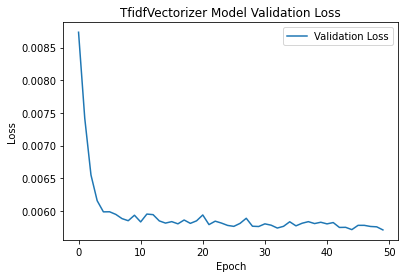

Total parameters for TfidfVectorizer @ eps50: 25920
Mean Squared Error (MSE) of TfidfVectorizer @ eps50: 0.005709381363100172
Root Mean Squared Error (RMSE)  of TfidfVectorizer @ eps50: 0.07556044840457322
Mean Absolute Error (MAE)  of TfidfVectorizer @ eps50: 0.01756968059721387
R-Squared  of TfidfVectorizer @ eps50: 0.04989258957841253


In [44]:
# Define the ANN model
model2 = Sequential()
model2.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(y_train.shape[1], activation='linear'))  # Linear output layer for regression-type output

# Compile the model
model2.compile(loss='mse', optimizer='adam')  # Using MSE loss for vector output
# Start time
start_time = time.time()

# Train the model
history1=model2.fit(X_train.toarray(), y_train.toarray(), epochs=50, batch_size=8, validation_data=(X_test.toarray(), y_test.toarray()))

# Get the output vectors from the model
output_vectors1 = model2.predict(X_test.toarray())
# End time
end_time = time.time()

# Calculate CPU time taken
cpu_time = end_time - start_time
# Use cosine similarity to recommend the closest title
# Calculate CPU time taken
cpu_time = end_time - start_time
print(f"CPU Time  of TfidfVectorizer @ eps50: {cpu_time} seconds")

# Plot the validation loss
plt.plot(history1.history['val_loss'])
plt.title('TfidfVectorizer Model Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Validation Loss'], loc='upper right')
plt.show()
# Total number of parameters
total_params2 = model2.count_params()
print(f"Total parameters for TfidfVectorizer @ eps50: {total_params2}")



mse = mean_squared_error(y_test.toarray(), output_vectors1)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test.toarray(), output_vectors1)
r2 = r2_score(y_test.toarray(), output_vectors1)

print(f"Mean Squared Error (MSE) of TfidfVectorizer @ eps50: {mse}")
print(f"Root Mean Squared Error (RMSE)  of TfidfVectorizer @ eps50: {rmse}")
print(f"Mean Absolute Error (MAE)  of TfidfVectorizer @ eps50: {mae}")
print(f"R-Squared  of TfidfVectorizer @ eps50: {r2}")

In [45]:

# 
from tensorflow.keras.layers import BatchNormalization
model3 = Sequential()
model3.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.3))
model3.add(Dense(256, activation='relu'))
model3.add(Dense(128, activation='relu'))
model3.add(Dense(y_train.shape[1], activation='linear'))  # Linear output layer for regression

# Compile the model
model3.compile(loss='mse', optimizer=Adam(learning_rate=1e-4))  # Using MSE loss for regression

# Start time
start_time = time.time()

from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model3.fit(X_train.toarray(), y_train.toarray(), epochs=50, batch_size=8, validation_data=(X_test.toarray(), y_test.toarray()), callbacks=[early_stopping])
# Train the model


# Get the output vectors from the model
output_vectors2 = model3.predict(X_test.toarray())

# End time
end_time = time.time()

# Calculate CPU time taken
cpu_time = end_time - start_time
print(f"CPU Time TfidfVectorizer @ model3 : {cpu_time} seconds")


# Total number of parameters
total_params3 = model3.count_params()
print(f"Total parameters for TfidfVectorizer for model3: {total_params3}")


# Calculate evaluation metrics
mse = mean_squared_error(y_test.toarray(), output_vectors2)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test.toarray(), output_vectors2)
r2 = r2_score(y_test.toarray(), output_vectors2)

print(f"Mean Squared Error (MSE) for TfidfVectorizer for model3: {mse}")
print(f"Root Mean Squared Error (RMSE) for TfidfVectorizer for model3: {rmse}")
print(f"Mean Absolute Error (MAE) for TfidfVectorizer for model3: {mae}")
print(f"R-Squared for TfidfVectorizer for model3: {r2}")

Epoch 1/50


C:\Users\pc\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1333 - val_loss: 0.0102
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0556 - val_loss: 0.0101
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0355 - val_loss: 0.0101
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0258 - val_loss: 0.0100
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0210 - val_loss: 0.0100
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0173 - val_loss: 0.0100
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0147 - val_loss: 0.0099
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0140 - val_loss: 0.0099
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0129 - val_loss: 0.0099
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0116 - val_loss: 0.0098
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0115 - val_loss: 0.0097
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0109 - val_loss: 0.0097


In [46]:
# HyperModel class for Keras Tuner
class MyHyperModel(HyperModel):
    def build(self, hp):
        model = Sequential()
        model.add(Dense(units=hp.Int('units_1', min_value=32, max_value=256, step=32),
                        input_dim=X_train.shape[1], activation='relu'))
        model.add(Dropout(rate=hp.Float('dropout_1', min_value=0.0, max_value=0.5, step=0.1)))
        model.add(Dense(units=hp.Int('units_2', min_value=32, max_value=128, step=32),
                        activation='relu'))
        model.add(Dropout(rate=hp.Float('dropout_2', min_value=0.0, max_value=0.5, step=0.1)))
        model.add(Dense(units=hp.Int('units_3', min_value=16, max_value=64, step=16),
                        activation='relu'))
        model.add(Dense(y_train.shape[1], activation='linear'))

        model.compile(optimizer=Adam(hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')),
                      loss='mse')
        return model

# Instantiate the tuner
tuner = RandomSearch(MyHyperModel(),
                     objective='val_loss',
                     max_trials=10,
                     executions_per_trial=2,
                     directory='my_dir',
                     project_name='ann_hyperparam_tuning')

# Perform the hyperparameter search
tuner.search(X_train.toarray(), y_train.toarray(), epochs=10, validation_data=(X_test.toarray(), y_test.toarray()))

# Start time
start_time = time.time()
# Retrieve the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Train the best model
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
best_model.fit(X_train.toarray(), y_train.toarray(), epochs=50, validation_data=(X_test.toarray(), y_test.toarray()), callbacks=[early_stopping])

# Train the model
# Total number of parameters
total_params3 = best_model.count_params()
print(f"Total parameters for TfidfVectorizer for best model: {total_params3}")

# End time
end_time = time.time()

# Calculate CPU time taken
cpu_time = end_time - start_time
print(f"CPU Time TTfidfVectorizer for best model: {cpu_time} seconds")


# Get the output vectors from the best model
output_vectors3 = best_model.predict(X_test.toarray())


# Calculate evaluation metrics
mse = mean_squared_error(y_test.toarray(), output_vectors3)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test.toarray(), output_vectors3)
r2 = r2_score(y_test.toarray(), output_vectors3)

print(f"Mean Squared Error (MSE) for TfidfVectorizer for best model: {mse}")
print(f"Root Mean Squared Error (RMSE) for TfidfVectorizer for best model: {rmse}")
print(f"Mean Absolute Error (MAE) for TfidfVectorizer for best model: {mae}")
print(f"R-Squared for TfidfVectorizer for best model: {r2}")



Trial 10 Complete [00h 00m 09s]
val_loss: 0.009637502487748861

Best val_loss So Far: 0.005920141702517867
Total elapsed time: 00h 01m 25s
Epoch 1/50


C:\Users\pc\AppData\Roaming\Python\Python39\site-packages\keras\src\saving\saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0060 - val_loss: 0.0060
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0057 - val_loss: 0.0060
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0059 - val_loss: 0.0060
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0057 - val_loss: 0.0059
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0056 - val_loss: 0.0059
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0056 - val_loss: 0.0060
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0057 - val_loss: 0.0059
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0057 - val_loss: 0.0058
Epoch 9/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0054 - val_loss: 0.0059
Epoch 10/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0056 - val_loss: 0.0059
Epoch 11/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0055 - val_loss: 0.0059
Epoch 12/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0056 - val_loss: 0.0058

### Word2Vec

In [47]:
# Assuming text  is tokenized
input_tokens = df['combined_text'].apply(lambda x: x.split())
output_tokens = df['cleaned_title'].apply(lambda x: x.split())
model = Word2Vec(sentences=list(input_tokens) + list(output_tokens), vector_size=100, window=5, min_count=1)

# Convert tokens to vectors and calculate similarity
def vectorize_text(tokens):
    return np.mean([model.wv[word] for word in tokens if word in model.wv], axis=0)

input_vectors = np.array([vectorize_text(tokens) for tokens in input_tokens])
output_vectors = np.array([vectorize_text(tokens) for tokens in output_tokens])


In [48]:



# Split the data into training and test sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(input_vectors, output_vectors, test_size=0.2, random_state=42)


# Output the resulting splits
print("X_train  of Word2Vec :\n", X_train1)
print("y_train of Word2Vec:\n", y_train1)
print("X_test of Word2Vec:\n", X_test1)
print("y_test of Word2Vec:\n", y_test1)

X_train  of Word2Vec :
 [[ 0.01904327  0.18058622 -0.0131709  ... -0.07340615  0.00818802
   0.02452388]
 [ 0.01904327  0.18058622 -0.0131709  ... -0.07340615  0.00818802
   0.02452388]
 [ 0.00230009  0.1644083  -0.00747061 ... -0.06439863  0.0107941
   0.02228758]
 ...
 [ 0.00516584  0.1583709  -0.00886429 ... -0.06142113  0.01097713
   0.02189044]
 [ 0.02059046  0.15980764 -0.00952909 ... -0.06799544 -0.00379122
   0.01792347]
 [ 0.02278983  0.20942712 -0.00770054 ... -0.08480614  0.00326692
   0.01922689]]
y_train of Word2Vec:
 [[ 0.01888665  0.22133702 -0.01040573 ... -0.0857143   0.00973997
   0.02432361]
 [ 0.02018995  0.22070563 -0.01391645 ... -0.08477131  0.01043872
   0.0243502 ]
 [ 0.01666165  0.22178513 -0.01323473 ... -0.08827385  0.01075728
   0.02609041]
 ...
 [ 0.00984483  0.14462411 -0.0060095  ... -0.0568164   0.0024586
   0.01681766]
 [ 0.02458764  0.22636664 -0.01348006 ... -0.09375317  0.00739404
   0.02071798]
 [ 0.02847101  0.22623284 -0.00886951 ... -0.09197805 

In [49]:
# Define the ANN model
model5 = Sequential()
model5.add(Dense(128, input_dim=X_train1.shape[1], activation='relu'))
model5.add(Dropout(0.5))
model5.add(Dense(64, activation='relu'))
model5.add(Dense(32, activation='relu'))
model5.add(Dense(y_train1.shape[1], activation='linear'))  # Linear output layer for regression-type output

# Compile the model
model5.compile(loss='mse', optimizer='adam')  # Using MSE loss for vector output
# Start time
start_time = time.time()

# Train the model
model5.fit(X_train1, y_train1, epochs=10, batch_size=8, validation_data=(X_test1, y_test1))

# Get the output vectors from the model
output_vectors5 = model5.predict(X_test1)
# End time
end_time = time.time()

# Calculate CPU time taken
cpu_time = end_time - start_time
# Use cosine similarity to recommend the closest title
# Calculate CPU time taken
cpu_time = end_time - start_time
print(f"CPU Time of Word2Vec: {cpu_time} seconds")



mse = mean_squared_error(y_test1, output_vectors5)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test1, output_vectors5)
r2 = r2_score(y_test1, output_vectors5)

print(f"Mean Squared Error (MSE) of Word2Vec: {mse}")
print(f"Root Mean Squared Error (RMSE) of Word2Vec: {rmse}")
print(f"Mean Absolute Error (MAE) of Word2Vec: {mae}")
print(f"R-Squared of Word2Vec: {r2} ")

Epoch 1/10


C:\Users\pc\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0185 - val_loss: 0.0028
Epoch 2/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0025 - val_loss: 0.0014
Epoch 3/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0018 - val_loss: 0.0015
Epoch 4/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0019 - val_loss: 0.0013
Epoch 5/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0015 - val_loss: 0.0013
Epoch 6/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0015 - val_loss: 0.0012
Epoch 7/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 8/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 9/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 10/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0013 - val_loss: 0.0012
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
CPU Time of Word2Vec: 4.365614891052246 seconds
Mean Squared Error (MSE) of Word2Vec: 0.0012302709510549903
Root Mean Squared Error 

C:\Users\pc\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0369 - val_loss: 0.0194
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0169 - val_loss: 0.0169
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0124 - val_loss: 0.0143
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0098 - val_loss: 0.0113
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0073 - val_loss: 0.0073
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0053 - val_loss: 0.0042
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0040 - val_loss: 0.0029
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0030 - val_loss: 0.0020
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0025 - val_loss: 0.0017
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0020 - val_loss: 0.0018
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0021 - val_loss: 0.0016
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0018 - val_lo

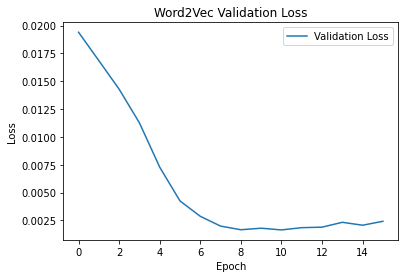

Mean Squared Error (MSE) Word2Vec @ eps50: 0.0016441191546618938
Root Mean Squared Error (RMSE) Word2Vec @ eps50: 0.04054773920531074
Mean Absolute Error (MAE) Word2Vec @ eps50: 0.02978547289967537
R-Squared Word2Vec @ eps50: -4.994848792237352


In [50]:
# Define the ANN model
model6 = Sequential()
model6.add(Dense(128, input_dim=X_train1.shape[1], activation='relu'))
model6.add(BatchNormalization())
model6.add(Dropout(0.3))
model6.add(Dense(256, activation='relu'))
model6.add(Dense(128, activation='relu'))
model6.add(Dense(y_train1.shape[1], activation='linear'))  # Linear output layer for regression

# Compile the model
model6.compile(loss='mse', optimizer=Adam(learning_rate=1e-4))  # Using MSE loss for regression

# Start time
start_time = time.time()

from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history2=model6.fit(X_train1, y_train1, epochs=50, batch_size=8, validation_data=(X_test1, y_test1), callbacks=[early_stopping])
# Train the model


# Get the output vectors from the model
output_vectors6 = model6.predict(X_test1)

# End time
end_time = time.time()

# Calculate CPU time taken
cpu_time = end_time - start_time
print(f"CPU Time of Word2Vec @ eps50: {cpu_time} seconds")

# Plot the validation loss
plt.plot(history2.history['val_loss'])
plt.title('Word2Vec Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Validation Loss'], loc='upper right')
plt.show()

# Calculate evaluation metrics
mse = mean_squared_error(y_test1, output_vectors6)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test1, output_vectors6)
r2 = r2_score(y_test1, output_vectors6)

print(f"Mean Squared Error (MSE) Word2Vec @ eps50: {mse}")
print(f"Root Mean Squared Error (RMSE) Word2Vec @ eps50: {rmse}")
print(f"Mean Absolute Error (MAE) Word2Vec @ eps50: {mae}")
print(f"R-Squared Word2Vec @ eps50: {r2}")

In [51]:

# 
from tensorflow.keras.layers import BatchNormalization
model7 = Sequential()
model7.add(Dense(128, input_dim=X_train1.shape[1], activation='relu'))
model7.add(BatchNormalization())
model7.add(Dropout(0.3))
model7.add(Dense(256, activation='relu'))
model7.add(Dense(128, activation='relu'))
model7.add(Dense(y_train1.shape[1], activation='linear'))  # Linear output layer for regression

# Compile the model
model7.compile(loss='mse', optimizer=Adam(learning_rate=1e-4))  # Using MSE loss for regression

# Start time
start_time = time.time()

from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model7.fit(X_train1, y_train1, epochs=50, batch_size=8, validation_data=(X_test1, y_test1), callbacks=[early_stopping])
# Train the model


# Get the output vectors from the model
output_vectors7 = model7.predict(X_test1)

# End time
end_time = time.time()

# Calculate CPU time taken
cpu_time = end_time - start_time
print(f"CPU Time  @  Word2Vec model7 : {cpu_time} seconds")


# Total number of parameters
total_params7 = model7.count_params()
print(f"Total parameters for  Word2Vec model7: {total_params7}")


# Calculate evaluation metrics
mse = mean_squared_error(y_test1, output_vectors7)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test1, output_vectors7)
r2 = r2_score(y_test1, output_vectors7)

print(f"Mean Squared Error (MSE) for  Word2Vec model7: {mse}")
print(f"Root Mean Squared Error (RMSE) for  Word2Vec model7: {rmse}")
print(f"Mean Absolute Error (MAE) for  Word2Vec model7: {mae}")
print(f"R-Squared for TfidfVectorizer for  Word2Vec model7: {r2}")

Epoch 1/50


C:\Users\pc\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0349 - val_loss: 0.0194
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0176 - val_loss: 0.0165
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0114 - val_loss: 0.0126
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0077 - val_loss: 0.0078
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0051 - val_loss: 0.0043
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0038 - val_loss: 0.0024
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0029 - val_loss: 0.0018
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0022 - val_loss: 0.0015
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0021 - val_loss: 0.0015
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0018 - val_loss: 0.0017
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0019 - val_loss: 0.0016
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0016 - val_loss: 0.0016

In [52]:
# HyperModel class for Keras Tuner
class MyHyperModel(HyperModel):
    def build(self, hp):
        model = Sequential()
        model.add(Dense(units=hp.Int('units_1', min_value=32, max_value=256, step=32),
                        input_dim=X_train1.shape[1], activation='relu'))
        model.add(Dropout(rate=hp.Float('dropout_1', min_value=0.0, max_value=0.5, step=0.1)))
        model.add(Dense(units=hp.Int('units_2', min_value=32, max_value=128, step=32),
                        activation='relu'))
        model.add(Dropout(rate=hp.Float('dropout_2', min_value=0.0, max_value=0.5, step=0.1)))
        model.add(Dense(units=hp.Int('units_3', min_value=16, max_value=64, step=16),
                        activation='relu'))
        model.add(Dense(y_train1.shape[1], activation='linear'))

        model.compile(optimizer=Adam(hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')),
                      loss='mse')
        return model

# Instantiate the tuner
tuner = RandomSearch(MyHyperModel(),
                     objective='val_loss',
                     max_trials=10,
                     executions_per_trial=2,
                     directory='my_dir2',
                     project_name='ann_hyperparam_tuning')

# Perform the hyperparameter search
tuner.search(X_train1,  y_train1, epochs=10, validation_data=(X_test1, y_test1))

# Start time
start_time = time.time()
# Retrieve the best model
best_model_W = tuner.get_best_models(num_models=1)[0]

# Train the best model
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
best_model_W.fit(X_train1, y_train1, epochs=50, validation_data=(X_test1, y_test1), callbacks=[early_stopping])

# Train the model
# Total number of parameters
total_params8 = best_model_W.count_params()
print(f"Total parameters for  Word2Vec FOR best model: {total_params8}")

# End time
end_time = time.time()

# Calculate CPU time taken
cpu_time = end_time - start_time
print(f"CPU Time  Word2Vec for best model: {cpu_time} seconds")

# Get the output vectors from the best model
output_vectors8 = best_model_W.predict(X_test1)


# Calculate evaluation metrics
mse = mean_squared_error(y_test1, output_vectors8)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test1, output_vectors8)
r2 = r2_score(y_test1, output_vectors8)

print(f"Mean Squared Error (MSE) forWord2Vec  best model: {mse}")
print(f"Root Mean Squared Error (RMSE) for Word2Vec r best model: {rmse}")
print(f"Mean Absolute Error (MAE) for Word2Vec for best model: {mae}")
print(f"R-Squared for Word2Vec for best model: {r2}")



Trial 10 Complete [00h 00m 09s]
val_loss: 0.002581797307357192

Best val_loss So Far: 0.0011638018186204135
Total elapsed time: 00h 01m 26s
Epoch 1/50


C:\Users\pc\AppData\Roaming\Python\Python39\site-packages\keras\src\saving\saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0016 - val_loss: 0.0012
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0016 - val_loss: 0.0012
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 9/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 10/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 11/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 12/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0013 - val_loss: 0.0012

### Sentence Transformer

In [53]:
model = SentenceTransformer('bert-base-nli-mean-tokens')

input_embeddings = model.encode(df['combined_text'].tolist())
ouput_embeddings = model.encode(df['cleaned_title'].tolist())




C:\Users\pc\AppData\Roaming\Python\Python39\site-packages\transformers\tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [54]:
# Split the data into training and test sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(input_embeddings,ouput_embeddings, test_size=0.2, random_state=42)


# Output the resulting splits
print("X_train of SentenceTransformer :\n", X_train2)
print("y_train of SentenceTransformer:\n", y_train2)
print("X_test of SentenceTransformer:\n", X_test2)
print("y_test of SentenceTransformer:\n", y_test2)

X_train of SentenceTransformer :
 [[ 0.06318498  0.6333861   1.3388988  ... -1.0798568  -1.3627667
   0.20980883]
 [ 0.06318498  0.6333861   1.3388988  ... -1.0798568  -1.3627667
   0.20980883]
 [-0.3886895   0.3552835   1.1979016  ... -1.1159034  -1.2928485
   0.47764987]
 ...
 [-0.41345683  0.01001457  1.2099111  ... -0.7283042  -1.1018764
   0.646496  ]
 [-0.48962864  0.6017656   1.206651   ... -0.79114217 -0.7467023
   0.4761393 ]
 [ 0.20889954  0.5459223   0.6842605  ... -0.1944906  -0.47822234
   0.66107243]]
y_train of SentenceTransformer:
 [[-0.33715296  0.09907915  1.7642883  ... -1.0190043  -1.0258713
   0.47745332]
 [-0.28265765  0.27495787  1.5167013  ... -0.80372334 -0.8259524
   0.2642405 ]
 [-0.44899938  0.24189857  0.8686457  ... -0.985922   -1.4157223
   0.26381284]
 ...
 [-0.28907153 -0.24249417  0.97908235 ... -0.85391575 -0.7615088
  -0.32790157]
 [-0.40962082  0.32587576  0.9877354  ... -0.90933067 -0.8988733
   0.23362322]
 [ 0.5400606   0.59966564  0.8129682  ...

In [55]:
# Define the ANN model
model9 = Sequential()
model9.add(Dense(128, input_dim=X_train2.shape[1], activation='relu'))
model9.add(Dropout(0.5))
model9.add(Dense(64, activation='relu'))
model9.add(Dense(32, activation='relu'))
model9.add(Dense(y_train2.shape[1], activation='linear'))  # Linear output layer for regression-type output

# Compile the model
model9.compile(loss='mse', optimizer='adam')  # Using MSE loss for vector output
# Start time
start_time = time.time()

# Train the model
model9.fit(X_train2, y_train2, epochs=10, batch_size=8, validation_data=(X_test2, y_test2))

# Get the output vectors from the model
output_vectors9= model9.predict(X_test2)
# End time
end_time = time.time()

# Calculate CPU time taken
cpu_time = end_time - start_time
# Use cosine similarity to recommend the closest title
# Calculate CPU time taken
cpu_time = end_time - start_time
print(f"CPU Time of  SentenceTransformer : {cpu_time} seconds")


mse = mean_squared_error(y_test2, output_vectors9)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test2, output_vectors9)
r2 = r2_score(y_test2, output_vectors9)

print(f"Mean Squared Error (MSE) of  SentenceTransformer: {mse}")
print(f"Root Mean Squared Error (RMSE) of  SentenceTransformer: {rmse}")
print(f"Mean Absolute Error (MAE) of  SentenceTransformer: {mae}")
print(f"R-Squared of  SentenceTransformer: {r2} ")

Epoch 1/10


C:\Users\pc\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.2846 - val_loss: 0.1589
Epoch 2/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1561 - val_loss: 0.1513
Epoch 3/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1467 - val_loss: 0.1550
Epoch 4/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1427 - val_loss: 0.1492
Epoch 5/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1375 - val_loss: 0.1401
Epoch 6/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1292 - val_loss: 0.1347
Epoch 7/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1259 - val_loss: 0.1392
Epoch 8/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1220 - val_loss: 0.1368
Epoch 9/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1241 - val_loss: 0.1302
Epoch 10/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1198 - val_loss: 0.1333
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
CPU Time of  SentenceTransformer : 4.701293230056763 seconds
Mean Squared Error (MSE) of  SentenceTransformer: 0.13328789174556732
R

Epoch 1/50


C:\Users\pc\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.2770 - val_loss: 0.1537
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1530 - val_loss: 0.1506
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1495 - val_loss: 0.1467
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1406 - val_loss: 0.1292
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1318 - val_loss: 0.1268
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1268 - val_loss: 0.1290
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1262 - val_loss: 0.1239
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1197 - val_loss: 0.1215
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1183 - val_loss: 0.1223
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1105 - val_loss: 0.1243
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1161 - val_loss: 0.1199
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1171 - val_loss: 0.1248


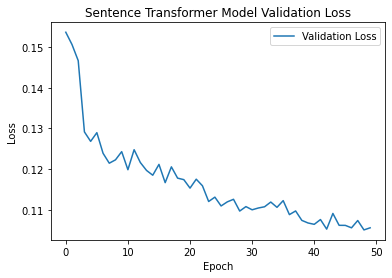

Mean Squared Error (MSE) of  SentenceTransformer @eps50 : 0.13328789174556732
Root Mean Squared Error (RMSE) of  SentenceTransformer @eps50: 0.3650861429109126
Mean Absolute Error (MAE) of  SentenceTransformer @eps50: 0.28771331906318665
R-Squared of  SentenceTransformer @eps50: -0.02121966490754563 


In [56]:
# Define the ANN model
model10 = Sequential()
model10.add(Dense(128, input_dim=X_train2.shape[1], activation='relu'))
model10.add(Dropout(0.5))
model10.add(Dense(64, activation='relu'))
model10.add(Dense(32, activation='relu'))
model10.add(Dense(y_train2.shape[1], activation='linear'))  # Linear output layer for regression-type output

# Compile the model
model10.compile(loss='mse', optimizer='adam')  # Using MSE loss for vector output
# Start time
start_time = time.time()

# Train the model
history3=model10.fit(X_train2, y_train2, epochs=50, batch_size=8, validation_data=(X_test2, y_test2))

# Get the output vectors from the model
output_vectors10= model10.predict(X_test2)



# End time
end_time = time.time()


# Calculate CPU time taken
cpu_time = end_time - start_time
# Use cosine similarity to recommend the closest title
# Calculate CPU time taken
cpu_time = end_time - start_time
print(f"CPU Time of  SentenceTransformer @eps50 : {cpu_time} seconds")

# Plot the validation loss
plt.plot(history3.history['val_loss'])
plt.title('Sentence Transformer Model Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Validation Loss'], loc='upper right')
plt.show()
mse = mean_squared_error(y_test2, output_vectors9)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test2, output_vectors9)
r2 = r2_score(y_test2, output_vectors9)

print(f"Mean Squared Error (MSE) of  SentenceTransformer @eps50 : {mse}")
print(f"Root Mean Squared Error (RMSE) of  SentenceTransformer @eps50: {rmse}")
print(f"Mean Absolute Error (MAE) of  SentenceTransformer @eps50: {mae}")
print(f"R-Squared of  SentenceTransformer @eps50: {r2} ")

| Model                 | Epochs  | CPU Time (seconds) | Total Parameters | MSE              | RMSE            | MAE               | R-Squared          |
|-----------------------|---------|--------------------|------------------|------------------|-----------------|-------------------|--------------------|
| TfidfVectorizer        | 10      | 29.74609661102295   | 25920            | 0.005765241698078678 | 0.07592918870947245 | 0.019335166344723986 | 0.04414167266419359 |
| TfidfVectorizer        | 50      | 46.920971632003784  | 25920            | 0.005790139866572952 | 0.0760929685751118  | 0.017822185922408373 | 0.04371157238465945 |
| TfidfVectorizer (Model3)| 50      | 51.82085156440735   | 91232            | 0.0074793242805141  | 0.08648308667314147 | 0.038012714118956376 | -0.004437295352196772 |
| TfidfVectorizer (Hypertune) | --| 9.277451515197754  | 65024            | 0.005733091849427943 | 0.0757171833167871  | 0.02007840253970756  | 0.04393544242157545 |
| Word2Vec              | 10      | 28.888023853302002  | 25920              | 0.0014701798791065812 | 0.03834292475942049 | 0.025767233222723007 | -0.17045314457758218 |
| Word2Vec              | 50      | 42.95109248161316   | 25920              | 0.0013241013512015343 | 0.036388203462132264 | 0.025123445317149162 | -0.7617584003518942  |
| Word2Vec (Model7)      | 50      | 106.45168900489807  | 92260            | 0.001215761643834412  | 0.03486777371491349 | 0.024259857833385468 | -0.5696216350987428  |
| Word2Vec (Hypertune)  | -- | 11.223443269729614  | 15956            | 0.0013656704686582088 | 0.036954978942738   | 0.024736983701586723 | -0.024504267078398177 |
| SentenceTransformer   | 10      | 33.74744486808777   | 25920             | 0.13517148792743683   | 0.36765675286527355 | 0.2894457280635834   | 0.00916004397608807  |
| SentenceTransformer   | 50      | 42.58043074607849   | 25920              | 0.13517148792743683   | 0.36765675286527355 | 0.2894457280635834   | 0.00916004397608807  |


Conclusion:

TfidfVectorizer (Hypetuned Model) with 50 epochs is the most balanced choice for a recommendation system. It offers good performance with reasonable error rates and fast CPU time.

Word2Vec, while efficient in terms of CPU time, has an undesirable R-Squared, indicating that it might not generalize well.

SentenceTransformer is not suitable due to high error metrics and longer CPU time.

Therefore, TfidfVectorizer (Best Model) would be the best option for your recommendation system.

In [57]:
from sklearn.metrics import f1_score
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
import numpy as np
import warnings
from sklearn.metrics.pairwise import cosine_similarity

# Suppress warnings from BLEU score
warnings.filterwarnings("ignore", category=UserWarning, module='nltk')

# Get the output vectors from the best model
output_vectors = best_model.predict(X_test.toarray())

# Use cosine similarity to recommend the closest title
recommendations = cosine_similarity(output_vectors, title_tfidf.toarray())

# Function to calculate F1-score (token-level comparison)
def calculate_f1(actual_title, recommended_title):
    # Tokenize the titles into words
    actual_tokens = set(actual_title.lower().split())
    recommended_tokens = set(recommended_title.lower().split())
    
    # Create binary vectors for both
    all_tokens = actual_tokens.union(recommended_tokens)
    actual_vector = [1 if token in actual_tokens else 0 for token in all_tokens]
    recommended_vector = [1 if token in recommended_tokens else 0 for token in all_tokens]
    
    # Calculate F1-score
    return f1_score(actual_vector, recommended_vector)

# Variables to accumulate scores
total_f1 = 0
total_bleu = 0
num_samples = X_test.shape[0]

# For each test case, find the closest title based on cosine similarity
for i in range(num_samples):
    recommended_title_index = np.argmax(recommendations[i])
    recommended_title = df['Title'][recommended_title_index]
    actual_title = df['Title'][y_test.toarray()[i].argmax()]

    # Calculate F1-score and accumulate
    f1 = calculate_f1(actual_title, recommended_title)
    total_f1 += f1

    # Calculate BLEU Score with smoothing and accumulate
    actual_tokens = actual_title.lower().split()
    recommended_tokens = recommended_title.lower().split()
    smoothing = SmoothingFunction().method4
    bleu = sentence_bleu([actual_tokens], recommended_tokens, smoothing_function=smoothing)
    total_bleu += bleu

# Calculate overall average F1 and BLEU scores
average_f1 = total_f1 / num_samples
average_bleu = total_bleu / num_samples

# Display the overall scores
print(f"Overall F1-Score: {average_f1:.2f}")
print(f"Overall BLEU Score: {average_bleu:.2f}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Overall F1-Score: 0.13
Overall BLEU Score: 0.02


In [58]:
total_f1 

13.751258727462794

In [59]:
best_model_W 

<Sequential name=sequential, built=True>

In [61]:
from sklearn.metrics import f1_score
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
import numpy as np
import warnings
from sklearn.metrics.pairwise import cosine_similarity

# Suppress warnings from BLEU score
warnings.filterwarnings("ignore", category=UserWarning, module='nltk')


# Use cosine similarity to recommend the closest title
recommendations = cosine_similarity(output_vectors10, ouput_embeddings)

# Function to calculate F1-score (token-level comparison)
def calculate_f1(actual_title, recommended_title):
    # Tokenize the titles into words
    actual_tokens = set(actual_title.lower().split())
    recommended_tokens = set(recommended_title.lower().split())
    
    # Create binary vectors for both
    all_tokens = actual_tokens.union(recommended_tokens)
    actual_vector = [1 if token in actual_tokens else 0 for token in all_tokens]
    recommended_vector = [1 if token in recommended_tokens else 0 for token in all_tokens]
    
    # Calculate F1-score
    return f1_score(actual_vector, recommended_vector)

# Variables to accumulate scores
total_f1 = 0
total_bleu = 0
num_samples = X_test2.shape[0]

# For each test case, find the closest title based on cosine similarity
for i in range(num_samples):
    recommended_title_index = np.argmax(recommendations[i])
    recommended_title = df['Title'][recommended_title_index]
    actual_title = df['Title'][y_test1[i].argmax()]

    # Calculate F1-score and accumulate
    f1 = calculate_f1(actual_title, recommended_title)
    total_f1 += f1

    # Calculate BLEU Score with smoothing and accumulate
    actual_tokens = actual_title.lower().split()
    recommended_tokens = recommended_title.lower().split()
    smoothing = SmoothingFunction().method4
    bleu = sentence_bleu([actual_tokens], recommended_tokens, smoothing_function=smoothing)
    total_bleu += bleu

# Calculate overall average F1 and BLEU scores
average_f1 = total_f1 / num_samples
average_bleu = total_bleu / num_samples

# Display the overall scores
print(f"Overall F1-Score FOR sentence transformer: {average_f1:.2f}")
print(f"Overall BLEU Score for sentence transformer : {average_bleu:.2f}")


Overall F1-Score FOR sentence transformer: 0.18
Overall BLEU Score for sentence transformer : 0.04


In [62]:


# Get the output vectors from the best model
output_vectors = best_model.predict(X_test.toarray())

# Use cosine similarity to recommend the closest title
recommendations = cosine_similarity(output_vectors, title_tfidf.toarray())

# For each test case, find the closest title based on cosine similarity
for i in range(X_test.shape[0]):
    recommended_title_index = np.argmax(recommendations[i])
    print(f"Recommended Title: {df['Title'][recommended_title_index]}")
    print(f"Actual Title: {df['Title'][y_test.toarray()[i].argmax()]}")
    print('-' * 50)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Recommended Title: next-generation software engineering: function extraction for computation of software behavior
Actual Title: machine learning and artificial intelligence in research and healthcare
--------------------------------------------------
Recommended Title: next-generation software engineering: function extraction for computation of software behavior
Actual Title: artificial intelligence and machine learning in cancer imaging
--------------------------------------------------
Recommended Title: mecinot: a multi-access edge computing and industrial internet of things emulator for the modelling and study of cybersecurity threats
Actual Title: machine learning and artificial intelligence to aid climate change research and preparedness
--------------------------------------------------
Recommended Title: big data analytics and big data science: a survey
Actual Title: artificial intelligence to deep learning: machine intelligence approach fo

In [63]:
def preprocess_user_input(interests, social_activities, industry, background, experience):
    # Combine user input into a single text
    combined_text = f"{interests} {social_activities} {industry} {background} {experience}"
    return combined_text


def vectorize_user_input(user_input, tfidf_vectorizer):
    # Transform user input to match the TF-IDF vectorizer
    return tfidf_vectorizer.transform([user_input])


def predict_title(user_input, model, tfidf_vectorizer, title_tfidf):
    # Get the vector for the user input
    user_vector = vectorize_user_input(user_input, tfidf_vectorizer)
    
    # Predict the output vectors for the user input
    output_vector = model.predict(user_vector.toarray())
    
    # Calculate cosine similarity between user vector and title vectors
    recommendations = cosine_similarity(output_vector, title_tfidf.toarray())
    
    # Find the index of the most similar title
    recommended_title_index = np.argmax(recommendations)
    
    return recommended_title_index


def recommend_title(interests, social_activities, industry, background, experience, model, tfidf_vectorizer, df):
    # Preprocess user input
    user_input = preprocess_user_input(interests, social_activities, industry, background, experience)
    
    # Predict the title
    recommended_index = predict_title(user_input, model, tfidf_vectorizer, title_tfidf)
    
    # Return the recommended title
    return df['Title'][recommended_index]




In [64]:


# Example usage with user input
interests = input("Enter your interests: ")
social_activities = input("Enter your social activities: ")
industry = input("Enter your industry: ")
background = input("Enter your background: ")
experience = input("Enter your experience: ")


recommended_title = recommend_title(interests, social_activities, industry, background, experience, best_model, tfidf, df)
print(f"Recommended Title: {recommended_title}")

Enter your interests: Cybersecurity
Enter your social activities: Networking with individuals in my tech communities
Enter your industry: Technology
Enter your background: Data Analytics
Enter your experience: software
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Recommended Title: cybersecurity data science: an overview from machine learning perspective


In [65]:
# Example usage with user input
interests = input("Enter your interests: ")
social_activities = input("Enter your social activities: ")
industry = input("Enter your industry: ")
background = input("Enter your background: ")
experience = input("Enter your experience: ")


recommended_title = recommend_title(interests, social_activities, industry, background, experience, best_model, tfidf, df)
print(f"Recommended Title: {recommended_title}")

Enter your interests: Software Engineering
Enter your social activities: gaming
Enter your industry: Fintech
Enter your background: Computer Science
Enter your experience: Frontend Developer
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
Recommended Title: next-generation software engineering: function extraction for computation of software behavior


In [66]:
# Example usage with user input
interests = input("Enter your interests: ")
social_activities = input("Enter your social activities: ")
industry = input("Enter your industry: ")
background = input("Enter your background: ")
experience = input("Enter your experience: ")


recommended_title = recommend_title(interests, social_activities, industry, background, experience, best_model, tfidf, df)
print(f"Recommended Title: {recommended_title}")

Enter your interests: Software Engineering
Enter your social activities: gaming
Enter your industry: Cybersecurity
Enter your background: Computer Science
Enter your experience: data analyst
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Recommended Title: next-generation software engineering: function extraction for computation of software behavior


In [88]:
# Example usage
interests = "Cybersecurity"

social_activities = "Photography, Networking with individuals in my tech communities, Attending events. Hangouts"
industry = "Technology"
background = "Data Analytics"
experience = "software"

recommended_title = recommend_title(interests, social_activities, industry, background, experience, best_model, tfidf, df)
print(f"Recommended Title: {recommended_title}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Recommended Title: cybersecurity for control systems: a process-aware perspective


In [91]:
# Example usage
interests = "Artificial Intelligence (AI) and Machine Learning (ML)"
social_activities = "LIONs club"
industry = "Technology"
background = "computer science"
experience = "Technical Consultant"

recommended_title = recommend_title(interests, social_activities, industry, background, experience, best_model, tfidf, df)
print(f"Recommended Title: {recommended_title}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
Recommended Title: edge computing with artificial intelligence: a machine learning perspective


In [65]:
# Example usage
interests = "Software Engineering"
social_activities = "gaming"
industry = "Fintech"
background = "computer science"
experience = "Frontend Developer"

recommended_title = recommend_title(interests, social_activities, industry, background, experience, best_model, tfidf, df)
print(f"Recommended Title: {recommended_title}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 556ms/step
Recommended Title: property-based software engineering measurement


In [ ]:


# Example usage with user input
interests = input("Enter your interests: ")
social_activities = input("Enter your social activities: ")
industry = input("Enter your industry: ")
background = input("Enter your background: ")
experience = input("Enter your experience: ")


recommended_title = recommend_title(interests, social_activities, industry, background, experience, best_model, tfidf, df)
print(f"Recommended Title: {recommended_title}")